# Xabarins Overview

# Imports 

In [99]:
import pandas as pd 
import numpy as np
from unicodedata import normalize
import re
import matplotlib.pyplot as plt

# Code 

## Import df 

In [6]:
df_small = pd.read_csv("../src/dades/font/certificats.csv")

C:\Users\joelx\AppData\Local\Temp\ipykernel_34784\2455367483.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_small = pd.read_csv("../src/dades/font/certificats.csv")


In [20]:
df_big_raw = pd.read_csv("../data/Certificats_d_efici_ncia_energ_tica_d_edificis_20250204.csv")

C:\Users\joelx\AppData\Local\Temp\ipykernel_34784\1237903497.py:1: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df_big_raw = pd.read_csv("../data/Certificats_d_efici_ncia_energ_tica_d_edificis_20250204.csv")


In [8]:
df_small.shape

(213291, 71)

In [9]:
df_big.shape

(1336925, 69)

In [11]:
df_small.columns

Index(['num_cas', 'adre_a', 'numero', 'escala', 'pis', 'porta', 'codi_postal',
       'poblacio', 'comarca', 'nom_provincia', 'codi_poblacio', 'codi_comarca',
       'codi_provincia', 'referencia_cadastral', 'zona_climatica',
       'metres_cadastre', 'any_construccio', 'us_edifici',
       'qualificaci_de_consum_d', 'energia_prim_ria_no_renovable',
       'qualificacio_d_emissions', 'emissions_de_co2',
       'consum_d_energia_final', 'cost_anual_aproximat_d_energia',
       'vehicle_electric', 'solar_termica', 'solar_fotovoltaica',
       'sistema_biomassa', 'xarxa_districte', 'energia_geotermica',
       'informe_ins_tecnica_edifici', 'eina_de_certificacio',
       'valor_aillaments', 'valor_finestres', 'motiu_de_la_certificacio',
       'valor_aillaments_cte', 'valor_finestres_cte', 'utm_x', 'utm_y',
       'normativa_construcci', 'tipus_tramit', 'tipus_terciari',
       'qualificaci_emissions', 'emissions_calefacci',
       'qualificaci_emissions_1', 'emissions_refrigeraci',
     

In [10]:
df_big.columns

Index(['NUM_CAS', 'ADREÇA', 'NUMERO', 'ESCALA', 'PIS', 'PORTA', 'CODI_POSTAL',
       'POBLACIO', 'COMARCA', 'NOM_PROVINCIA', 'CODI_POBLACIO', 'CODI_COMARCA',
       'CODI_PROVINCIA', 'REFERENCIA CADASTRAL', 'ZONA CLIMATICA',
       'METRES_CADASTRE', 'ANY_CONSTRUCCIO', 'US_EDIFICI',
       'Qualificació de consum d'energia primaria no renovable',
       'Energia primària no renovable', 'Qualificacio d'emissions de CO2',
       'Emissions de CO2', 'Consum d'energia final',
       'Cost anual aproximat d'energia per habitatge', 'VEHICLE ELECTRIC',
       'SOLAR TERMICA', 'SOLAR FOTOVOLTAICA', 'SISTEMA BIOMASSA',
       'XARXA DISTRICTE', 'ENERGIA GEOTERMICA', 'INFORME_INS_TECNICA_EDIFICI',
       'Eina de certificacio', 'VALOR AILLAMENTS', 'VALOR FINESTRES',
       'Motiu de la certificacio', 'VALOR AILLAMENTS CTE',
       'VALOR FINESTRES CTE', 'UTM_X', 'UTM_Y', 'Normativa construcció',
       'Tipus Tramit', 'TIPUS_TERCIARI', 'Qualificació emissions calefacció',
       'Emissions cale

In [52]:
df_big = df_big_raw.copy()

In [61]:
column_renames = {}
for column in df_big.columns:
    c_cleaned = column.lower().replace(" ", "_").replace("'","")
    c_cleaned = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", c_cleaned), 0, re.I
    )
    c_cleaned = normalize( 'NFC', c_cleaned)
    column_renames[column] = c_cleaned

In [65]:
df_big = df_big.rename(columns=column_renames)

## Overview

In [66]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336925 entries, 0 to 1336924
Data columns (total 69 columns):
 #   Column                                                 Non-Null Count    Dtype  
---  ------                                                 --------------    -----  
 0   num_cas                                                1336925 non-null  object 
 1   adreca                                                 1336925 non-null  object 
 2   numero                                                 1336866 non-null  object 
 3   escala                                                 275216 non-null   object 
 4   pis                                                    1002988 non-null  object 
 5   porta                                                  951983 non-null   object 
 6   codi_postal                                            1336922 non-null  float64
 7   poblacio                                               1336925 non-null  object 
 8   comarca               

In [136]:
columns_selected = [
    "num_cas",
    "zona_climatica",
    "metres_cadastre",
    "qualificacio_de_consum_denergia_primaria_no_renovable",
    "energia_primaria_no_renovable",
    "qualificacio_demissions_de_co2",
    "emissions_de_co2",
    "consum_denergia_final"
]

In [137]:
df_question_1 = df_big[columns_selected]

In [138]:
df_big["qualificacio_demissions_de_co2"].value_counts()/len(df_big)

qualificacio_demissions_de_co2
E    0.559492
D    0.126436
F    0.115933
G    0.102455
C    0.056510
B    0.020534
A    0.018641
Name: count, dtype: float64

In [92]:
df_big["emissions_de_co2"].value_counts()/len(df_big)

emissions_de_co2
37.50      4.944182e-04
36.40      4.831984e-04
35.00      4.802064e-04
34.60      4.787105e-04
34.50      4.712306e-04
               ...     
176.73     7.479851e-07
154.49     7.479851e-07
139.31     7.479851e-07
3525.30    7.479851e-07
202.29     7.479851e-07
Name: count, Length: 17910, dtype: float64

In [95]:
max(df_big["data_entrada"])

'31/12/2024'

## Plots

(0.0, 2000.0)

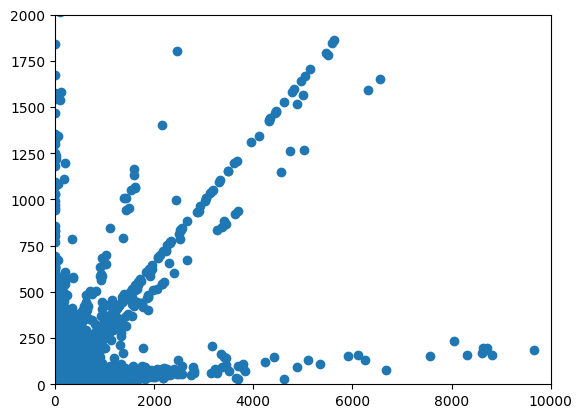

In [105]:
plt.scatter(df_question_1["consum_denergia_final"],df_question_1["emissions_de_co2"])
plt.xlim(0,10000)
plt.ylim(0,2000)

In [101]:
df_question_1.head()

,num_cas,zona_climatica,metres_cadastre,qualificacio_de_consum_denergia_primaria_no_renovable,energia_primaria_no_renovable,qualificacio_demissions_de_co2,emissions_de_co2,consum_denergia_final
0,ZJ04JN98B,E1,115.00,F,294.95,E,61.99,138.17
1,167H6HZJ3,C2,1696.39,A,311.80,A,52.50,0.00
2,3R8NLZQCC,C2,199.00,B,47.48,B,9.47,13.44
3,Q87DJVFN,C3,104.00,A,28.12,A,4.76,14.39
4,H5YDH45MC,D2,254.60,E,186.80,E,48.52,155.76


In [102]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336925 entries, 0 to 1336924
Data columns (total 69 columns):
 #   Column                                                 Non-Null Count    Dtype  
---  ------                                                 --------------    -----  
 0   num_cas                                                1336925 non-null  object 
 1   adreca                                                 1336925 non-null  object 
 2   numero                                                 1336866 non-null  object 
 3   escala                                                 275216 non-null   object 
 4   pis                                                    1002988 non-null  object 
 5   porta                                                  951983 non-null   object 
 6   codi_postal                                            1336922 non-null  float64
 7   poblacio                                               1336925 non-null  object 
 8   comarca               

In [103]:
df_big["referencia_cadastral"]

0          17177A001000160000EJ
1                           NaN
2                3152671DG8435S
3          3803642CF3630B0001OL
4          002206800CF88E0001WR
                   ...         
1336920    2294619DF5929S0020ZR
1336921    2391102DF5929S0107OM
1336922    0037004DF2903N0009QY
1336923    8630307DG5083S0001UZ
1336924    5294216DF2959H0010PE
Name: referencia_cadastral, Length: 1336925, dtype: object

## Feature engineering

In [152]:
df_big["ratio_eficiencia"] = np.maximum(0,(df_big["consum_denergia_final"]/df_big["emissions_de_co2"]))

In [153]:
df_big["ratio_eficiencia"] = df_big["ratio_eficiencia"].replace([np.inf, -np.inf], np.nan)

In [140]:
quals = np.unique(df_big["qualificacio_demissions_de_co2"])

In [172]:
for q in quals:
    ar = df_big[df_big["qualificacio_demissions_de_co2"]==q]["ratio_eficiencia"].dropna()
    mean_ratio = np.mean(df_big[df_big["qualificacio_demissions_de_co2"]==q]["ratio_eficiencia"].dropna())
    print(f"Qualificacion: {q} - mean: {mean_ratio} - q1: {np.quantile(ar,0.25)} - q2: {np.quantile(ar,0.50)} - q3: {np.quantile(ar,0.75)}")

Qualificacion: A - mean: 8.165199485839768 - q1: 3.019607843137255 - q2: 3.023809523809524 - q3: 3.932911392405063
Qualificacion: B - mean: 3.90681453477623 - q1: 3.0205680705190985 - q2: 3.064794816414687 - q3: 3.7751653196179284
Qualificacion: C - mean: 3.198088667231273 - q1: 3.020766630176537 - q2: 3.1538301215249946 - q3: 3.7751909199929004
Qualificacion: D - mean: 3.140392193348076 - q1: 3.020955211692521 - q2: 3.4945812807881773 - q3: 3.9047028994397417
Qualificacion: E - mean: 3.2478619062185654 - q1: 3.021548057839523 - q2: 3.771118903410902 - q3: 3.9442025579376914
Qualificacion: F - mean: 3.076504650295318 - q1: 3.0211218473304093 - q2: 3.66535731791699 - q3: 3.9449479274961683
Qualificacion: G - mean: 2.684880784921142 - q1: 1.2195128857683177 - q2: 3.215034028213452 - q3: 3.9312706236155965


In [ ]:
# año de construccion con la referencia catastral 


In [ ]:
columnas_catastro = ["nom_provincia", "poblacio", "adreca", "comarca"]

In [146]:
df_big[

,num_cas,adreca,numero,escala,pis,porta,codi_postal,poblacio,comarca,nom_provincia,...,qualificacio_energia_refrigeracio_demanda,energia_refrigeracio_demanda,ventilacio_us_residencial,longitud,latitud,georeferencia,rehabilitacio_energetica,actuacions_rehabilitacio,data_entrada,ratio_eficiencia
0,ZJ04JN98B,Polígon Polígon 1 Parcela 16 CAN PRIM,1,NaN,NaN,NaN,17860.0,Sant Joan de les Abadesses,Ripollès,Girona,...,D,11.26,NaN,NaN,NaN,NaN,NO,NaN,16/11/2021,2.228908
1,167H6HZJ3,Carretera C-245,79,NaN,NaN,NaN,8840.0,Viladecans,Baix Llobregat,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22/04/2016,0.000000
2,3R8NLZQCC,Carrer NORD,24,NaN,NaN,NaN,17180.0,Vilablareix,Gironès,Girona,...,D,14.12,NaN,NaN,NaN,NaN,NaN,NaN,14/10/2020,1.419219
3,Q87DJVFN,Carretera D'ALFORJA,11,NaN,NaN,NaN,43350.0,Alforja,Baix Camp,Tarragona,...,D,26.50,NaN,NaN,NaN,NaN,NO,NaN,14/11/2022,3.023109
4,H5YDH45MC,Disseminat CAL PAU DEL MOLÍ,S/N,NaN,NaN,NaN,8737.0,Torrelles de Foix,Alt Penedès,Barcelona,...,C,8.14,0.63,NaN,NaN,NaN,NO,NaN,17/01/2018,3.210223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336920,FBY9MHZWX,Plaça Gatassa,5,NaN,en,2,8303.0,Mataró,Maresme,Barcelona,...,C,5.43,0.66,2.425606,41.542538,POINT (2.425605507597 41.542537501582),NO,NaN,15/07/2018,3.953464
1336921,GBZ539JKC,Avinguda Puig i Cadafalch,178,NaN,2,3,8303.0,Mataró,Maresme,Barcelona,...,G,15.95,0.99,2.426638,41.540436,POINT (2.426638117015 41.540435749411),NO,NaN,12/12/2018,0.096618
1336922,BD1TS7S7K,Carrer VIA LACTIA,16,NaN,1,2,8191.0,Rubí,Vallès Occidental,Barcelona,...,C,4.11,0.63,2.040995,41.489694,POINT (2.040995076286 41.489694494853),NaN,NaN,09/09/2016,3.913559
1336923,6JP3ML7RN,Carrer BOUGANVILLES LES,1,NaN,NaN,NaN,8394.0,Sant Vicenç de Montalt,Maresme,Barcelona,...,B,4.81,0.63,2.502652,41.576547,POINT (2.502651979328 41.576546711983),NaN,NaN,10/01/2017,3.876382


In [162]:
df_big[df_big["qualificacio_demissions_de_co2"]=="E"]["ratio_eficiencia"].describe()

count    731615.000000
mean          3.247862
std           2.764866
min           0.000000
25%           3.021548
50%           3.771119
75%           3.944203
max        1275.444444
Name: ratio_eficiencia, dtype: float64

In [166]:
df_big[df_big["qualificacio_demissions_de_co2"]=="E"]["ratio_eficiencia"]

0          2.228908
4          3.210223
12         3.818110
17         3.156027
20         3.199384
             ...   
1336914    3.740849
1336915    3.939731
1336917    3.877419
1336921    0.096618
1336922    3.913559
Name: ratio_eficiencia, Length: 747999, dtype: float64